In [63]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [00:24<00:00, 101MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [78]:
import os
from PIL import Image
import numpy as np

normal_train_path = '/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train/NORMAL' # Defino la ruta donde estan los datos de entrenamiento de pacientes sanos

In [117]:
normal_data_training = np.zeros((1341,50,50), dtype=float) # Creo un array vacio para meter 1341 arrays de 50x50 píxeles que tiene cada imagen.
index = 0

for file in os.listdir(normal_train_path):
  file_path = f'{normal_train_path}/{file}'  # Voy recorriendo los elementos de la ruta y defino para cada archivo su ruta que queda almacenada en la variable file_path
  imagen = Image.open(file_path)             # Almaceno la imagen en una variable
  imagen_resized = imagen.resize((50,50))    # Redimensiono la imagen a 50x50 píxeles
  array_img = np.array(imagen_resized)       # Convierto la imagen en un array de numpy
  normal_data_training[index] = array_img    # Guardo el array en el array vacio que cree
  index += 1

In [146]:
pneumonia_train_path = '/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train/PNEUMONIA'
pneumonia_data_training = np.zeros((3875,50,50), dtype=float) # Creo un array vacío para meter 3875 imagenes de 50x50 píxeles.
index = 0
datos_eliminados = 0

for file in os.listdir(pneumonia_train_path):
  file_path = f'{pneumonia_train_path}/{file}'     # Recorro todos los archivos del directorio donde se almacenan las imagenes de entrenamiento de pacientes con neumonia
  imagen = Image.open(file_path)                   # Almaceno la imagen en una variable
  imagen_resized = imagen.resize((50,50))         # Redimensiono la imagen a 50x50 píxeles
  array_img = np.array(imagen_resized)            # Convierto la imagen en un array de numpy
  if np.shape(array_img) == (50,50):              # Meto un condicional para que elimine todos los arrays de imagenes que esten en color (shape de imagen de color = (50,50,3))
    pneumonia_data_training[index] = array_img    # Si el array tiene un shape de (50,50) lo almaceno en el array de datos de entrenamieto de pacientes con neumonia
  else:
    print('Dato Eliminado!')
    datos_eliminados += 1

  index += 1

print(f'Datos Eliminados: {datos_eliminados}')

Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eliminado!
Dato Eli

In [150]:
normal_test_path = '/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray/test/NORMAL'
normal_data_testing = np.zeros((234,50,50), dtype=float)
index = 0
datos_eliminados = 0

for file in os.listdir(normal_test_path):
  file_path = f'{normal_test_path}/{file}'
  imagen = Image.open(file_path)
  imagen_resized = imagen.resize((50,50))
  array_img = np.array(imagen_resized)
  if np.shape(array_img) == (50,50):
    normal_data_testing[index] = array_img
  else:
    print('Dato Eliminado!')
    datos_eliminados += 1

  index += 1

print(f'Datos Eliminados: {datos_eliminados}')

Datos Eliminados: 0


In [151]:
pneumonia_test_path = '/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray/test/PNEUMONIA'
pneumonia_data_testing = np.zeros((390,50,50), dtype=float)
index = 0
datos_eliminados = 0

for file in os.listdir(pneumonia_test_path):
  file_path = f'{pneumonia_test_path}/{file}'
  imagen = Image.open(file_path)
  imagen_resized = imagen.resize((50,50))
  array_img = np.array(imagen_resized)
  if np.shape(array_img) == (50,50):
    pneumonia_data_testing[index] = array_img
  else:
    print('Dato Eliminado!')
    datos_eliminados += 1

  index += 1

print(f'Datos Eliminados: {datos_eliminados}')

Datos Eliminados: 0


In [154]:
x_train = np.concatenate((normal_data_training, pneumonia_data_training), axis=0)
x_test = np.concatenate((normal_data_testing, pneumonia_data_testing),axis=0)     #Con concatenate uno los dos arrays en uno solo

In [156]:
y_train = np.concatenate((np.zeros(len(normal_data_training)), np.ones(len(pneumonia_data_training)))) # Creo un array lleno de 0 y 1. Los primeros 1341 elementos pertenecen a pacientes sanos.
y_test = np.concatenate((np.zeros(len(normal_data_testing)), np.ones(len(pneumonia_data_testing)))) ### Normal(0), Neumonia(1)

In [165]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [178]:
model = Sequential([

    Conv2D(32,(3,3), activation='relu', input_shape=(50,50,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1,activation='sigmoid')

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [179]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [182]:
history = model.fit(x_train,y_train, epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.9981 - loss: 0.0070 - val_accuracy: 0.7372 - val_loss: 2.1399
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.7516 - val_loss: 2.0208
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9994 - loss: 0.0044 - val_accuracy: 0.7436 - val_loss: 2.1196
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 1.0000 - loss: 9.8889e-04 - val_accuracy: 0.7468 - val_loss: 2.1018
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 1.0000 - loss: 6.0409e-04 - val_accuracy: 0.7468 - val_loss: 2.3178


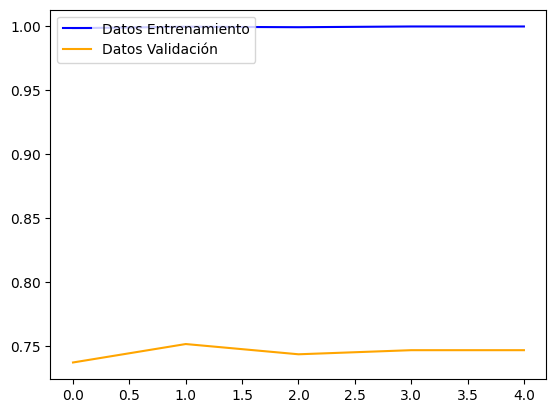

In [183]:
plt.plot(history.history['accuracy'], c='blue', label='Datos Entrenamiento')
plt.plot(history.history['val_accuracy'], c='orange', label='Datos Validación')
plt.legend(loc='upper left')
plt.show()